In [1]:
# Set up sys.path and import needed packages.
import _preamble

import numpy as np
import matplotlib.pyplot as plt

from pmte import tapers, util
import helpers

In [2]:
# Set basic parameters.
N = 128  # Size of images
Nf = 2 * N  # Size of frequency grid
W = 1 / 4  # Bandwidth

# Initialize PRNG.
rng = np.random.default_rng(0)

In [3]:
# Define grid of radii for the disk masks.
radii = np.geomspace(2 ** -4 * N, 2 ** -1 * N, 3 * 4 + 1)

In [4]:
# Calculate error in the accumulated spectral window for different masks.
rho_errors = []

for radius in radii:
    # Generate set of proxy tapers for a disk of radius r with bandwidth W.
    mask = helpers.disk_mask(N, radius)
    h = tapers.proxy_tapers(mask, W, rng=rng)

    # Calculate accumulated spectral window. This corresponds to eq. (4.1) in
    # the paper.
    rho = tapers.spectral_window(h, grid_sz=(Nf, Nf))

    # Get the target window 1_[–W/2,W/2] for the given bandwidth.
    rho_target = helpers.target_spectral_window(Nf, W)

    # Calculate spectral window error. This approximates the LHS of eq. (4.2)
    # in the paper.
    rho_error = np.mean(np.abs(rho - rho_target))

    rho_errors.append(rho_error)

# Convert to ndarray for processing.
rho_errors = np.array(rho_errors)

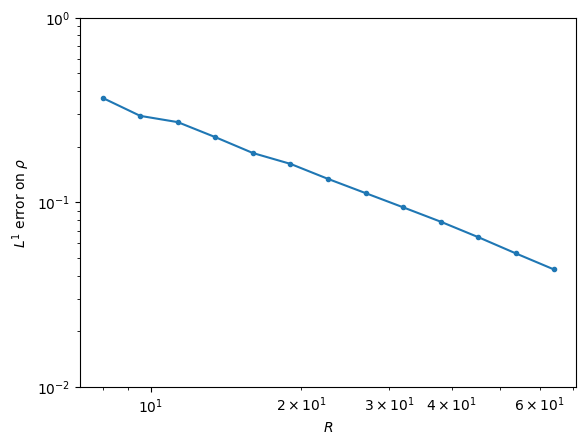

In [5]:
# Plot Figure 4(a) in paper.
plt.loglog(radii, rho_errors, ".-")
plt.yticks([1e-2, 1e-1, 1e0])
plt.xlabel("$R$")
plt.ylabel("$L^1$ error on $\\rho$")
plt.show(block=False)

In [6]:
# Calculate the slope of the log–log plot to see how well it corresponds with
# the bound, which specifies that the error should vary as R^{–1}.
beta = helpers.log_slope(radii, rho_errors)

print("Estimated exponent: %f" % (beta,))

Estimated exponent: -1.014586


---

In [7]:
# Save data for figure generation.
helpers.save_table("rho1_single", radii, rho_errors)

results = {"beta": float(beta)}
helpers.save_dictionary("rho1_single", results)